In [22]:
# change to GPU when using Keras!
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.regularizers import l2
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.utils import to_categorical
from tensorflow import keras

In [2]:
!ls sample_data

anscombe.json		      mnist_test.csv
california_housing_test.csv   mnist_train_small.csv
california_housing_train.csv  README.md


In [3]:
train = pd.read_csv('sample_data/mnist_train_small.csv', header=None)
X = train.iloc[:,1:785]
X /= 255
labels = train.iloc[:,0]
y = to_categorical(labels)

In [4]:
val = pd.read_csv('sample_data/mnist_test.csv', header=None)
X_val = val.iloc[:,1:785]
X_val /= 255
labels = val.iloc[:,0]
y_val = to_categorical(labels)

In [25]:
# build model. This is replicating NN_mnist
# kernel regularizer is weight decay. doesnt seem to help rn
model = Sequential([
  Dense(100, activation='sigmoid', kernel_regularizer=None, input_shape=(784,)),
  Dropout(0.01),
  BatchNormalization(),
  Dense(10, activation='sigmoid'),
])

# Compile the model. we used sqd before but we should use adam to decrease loss
# adam optimizer has a default learning rate of 0.001
adam = keras.optimizers.Adam(learning_rate=0.01)
model.compile(
  optimizer=adam,
  loss='mean_squared_error',
  metrics=['accuracy'],
)

# Train the model. xs, ys, steps, batching
train = model.fit(
  X,
  y,
  epochs=10,
  batch_size=32,
  validation_data = (X_val, y_val)
)

Epoch 1/10
625/625 [==============================] - 4s 4ms/step - loss: 0.0237 - accuracy: 0.8889 - val_loss: 0.0109 - val_accuracy: 0.9368
Epoch 2/10
625/625 [==============================] - 2s 4ms/step - loss: 0.0107 - accuracy: 0.9413 - val_loss: 0.0103 - val_accuracy: 0.9407
Epoch 3/10
625/625 [==============================] - 2s 4ms/step - loss: 0.0093 - accuracy: 0.9491 - val_loss: 0.0085 - val_accuracy: 0.9494
Epoch 4/10
625/625 [==============================] - 3s 5ms/step - loss: 0.0084 - accuracy: 0.9560 - val_loss: 0.0085 - val_accuracy: 0.9536
Epoch 5/10
625/625 [==============================] - 2s 4ms/step - loss: 0.0080 - accuracy: 0.9592 - val_loss: 0.0080 - val_accuracy: 0.9534
Epoch 6/10
625/625 [==============================] - 2s 4ms/step - loss: 0.0071 - accuracy: 0.9646 - val_loss: 0.0087 - val_accuracy: 0.9533
Epoch 7/10
625/625 [==============================] - 2s 4ms/step - loss: 0.0068 - accuracy: 0.9664 - val_loss: 0.0091 - val_accuracy: 0.9520
Epoch 

In [7]:
train.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

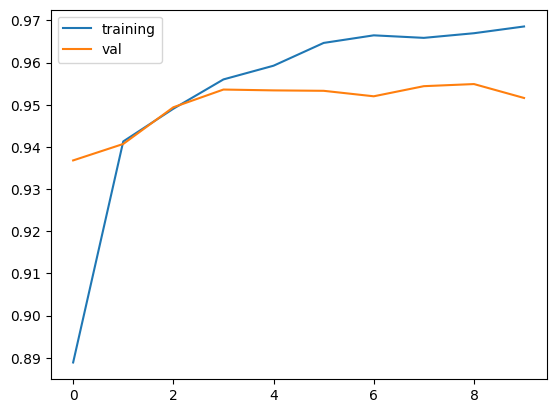

In [26]:
train_accuracy = train.history['accuracy']
val_accuracy = train.history['val_accuracy']
epochs = range(len(train_accuracy))
plt.plot(epochs, train_accuracy, label = 'training')
plt.plot(epochs, val_accuracy, label = 'val')
plt.legend()